# 代表的な自然言語処理; 日本語, spacyコード編
- [補足説明](./typical_methods.md)
- mecabによる形態素解析
    - 出力オプションの例
    - ノード単位で処理し、原型取得する例
- NLTKの利用
    - KWIC（もしくはKWIC index）
    - コロケーション（collocations）
    - 単語の出現頻度順
    - 単語の条件付き出現頻度
- KNPによる係り受け解析
    - 文節単位での処理例
    - 係り受けを利用したクエリ検索例

## 環境構築


In [1]:
!date

# 1. spacy, ginzaインストール
#!pip install -U spacy ginza
!pip install -U ginza

# 2. 言語モデルダウンロード sm=small, lg=large
!python -m spacy download ja_core_news_sm
#!python -m spacy download ja_core_news_lg

# 3. NLTKインストール
!pip install nltk

# 3. データセット用意
# データ準備
# https://newtechnologylifestyle.net/711-2/
# momotaro.txtは、上記を使ってルビを除外したもの。
!curl -O https://raw.githubusercontent.com/naltoma/datamining_intro/master/3-nlp/corpus/momotaro.txt
!mkdir corpus
!mv momotaro.txt corpus/
filename = "./corpus/momotaro.txt"

# 4. matplotlib で日本語フォントを使うための環境構築
!pip install japanize-matplotlib

# パッケージ管理リストを更新
import pkg_resources, imp
imp.reload(pkg_resources)

!date

Wed Apr 14 06:19:30 UTC 2021
     |████████████████████████████████| 10.4MB 8.7MB/s 
     |████████████████████████████████| 51.5MB 83kB/s 
     |████████████████████████████████| 71kB 4.1MB/s 
     |████████████████████████████████| 1.1MB 32.4MB/s 
     |████████████████████████████████| 481kB 43.6MB/s 
  Created wheel for ginza: filename=ginza-4.0.5-cp37-none-any.whl size=15896 sha256=aeedfcfb1f949ff0af4a9b8609bd0327c465282b81c7a6434cf2e05914b76aba
  Stored in directory: /root/.cache/pip/wheels/a2/4f/b8/74029780ece4fedfa1f16ba6b9b86fdeee8260ade265e3756e
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-cp37-none-any.whl size=51530814 sha256=b4cd3548e65fb54ea7f7e1dcb6a36050c0fd368fbc6a1ce0cf53c22909e22b37
  Stored in directory: /root/.cache/pip/wheels/28/5a/c0/95ac590b39eff99c77d729f284341d15a6903e4011d70ff421
  Created wheel for SudachiPy: filename=SudachiPy-0.5.2-cp37-cp37m-linux_x86_64.whl size=870187 sha256=b0f1e1cf199c424c977e50ec91c98bd389a4a059aac1af2aa2ca7e8773d419e6
  Sto

## 形態素解析

In [2]:
# 形態素解析
# 学習済みモデルにより解析結果(推定結果)が変わる
# Models & Languages: https://spacy.io/usage/models

import spacy

# Ginza利用
nlp = spacy.load("ja_ginza")

sentence = "格闘家ボブ・サップの出身国はどこでしょう。"
doc = nlp(sentence)
for sent in doc.sents:
  for token in sent:
    print(token)
  print("EOS")
print("-----")

# ja_core_news_sm利用
nlp = spacy.load("ja_core_news_sm")

doc = nlp(sentence)
for sent in doc.sents:
  for token in sent:
    print(token)
  print("EOS")

# 以下では ginza で実行。
nlp = spacy.load("ja_ginza")

格闘家
ボブ
・
サップ
の
出身国
は
どこ
でしょう
。
EOS
-----
格闘
家
ボブ
・
サップ
の
出身
国
は
どこ
でしょう
。
EOS


In [3]:
# parse結果の例

import pandas as pd
import numpy as np

text = '日本予防医学協会の説明に検査項目ごとの基準値が示されている。例えばASTは0〜40U/L、総コレステロールは130〜219mg/dL、HbA1cは4.6〜5.5%といった具合だ。'
doc = nlp(text)

columns = ["index", ".text", "t.lemma_", ".pos_", ".dep_",
           ".head.text", ".is_punct", ".is_digit", ".like_num"]
index = list(range(len(doc)))
data = []
for token in doc:
  parsed = [token.i, token.text, token.lemma_, token.pos_, token.dep_,
            token.head.text, token.is_punct, token.is_digit, token.like_num]
  data.append(parsed)

df = pd.DataFrame(np.array(data), columns=columns, index=index)
df


,index,.text,t.lemma_,.pos_,.dep_,.head.text,.is_punct,.is_digit,.like_num
0,0,日本,日本,PROPN,compound,協会,False,False,False
1,1,予防,予防,NOUN,compound,協会,False,False,False
2,2,医学,医学,NOUN,compound,協会,False,False,False
3,3,協会,協会,NOUN,nmod,説明,False,False,False
4,4,の,の,ADP,case,協会,False,False,False
5,5,説明,説明,NOUN,obl,示さ,False,False,False
6,6,に,に,ADP,case,説明,False,False,False
7,7,検査項目,検査項目,NOUN,compound,ごと,False,False,False
8,8,ごと,ごと,NOUN,nmod,基準値,False,False,False
9,9,の,の,ADP,case,ごと,False,False,False


In [4]:
print("----Docオブジェクトから名詞句を抽出----")
for np in doc.noun_chunks:
    print(np)


----Docオブジェクトから名詞句を抽出----
日本予防医学協会
説明
検査項目ごと
基準値
AST
0〜40U/L
総コレステロール
130〜219mg/dL
HbA1c
4.6〜5.5%
具合


## コンコーダンス（語句集）

In [5]:
# concordance

with open(filename, "r") as fh:
    sentences = ""
    for line in fh.readlines():
        sentences += line + " "

import nltk
nltk.download('stopwords')

def tokenize(sentences):
    """文章を分かち書きする。

    :param sentences(str): 複数の文章を含む文字列。日本語想定。
    :return(list): 分かち書きした単語をlistとしてまとめたもの。
    """
    nlp = spacy.load("ja_ginza")
    doc = nlp(sentences)
    tokens = []
    for token in doc:
      word = token.text
      if word == " " or word == "\n":
        continue
      tokens.append(word)

    return tokens

tokens = tokenize(sentences)
print(len(tokens), tokens[:10])
text = nltk.Text(tokens)
print('\n# nltk.Text.concordance with "おじいさん"')
text.concordance("おじいさん")
print('\n# nltk.Text.concordance with "じい"')
text.concordance("じい")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
3600 ['Download', 'URL', '\n ', 'URL', ':', 'https', ':', '/', '/', 'www']

# nltk.Text.concordance with "おじいさん"
No matches

# nltk.Text.concordance with "じい"
Displaying 24 of 24 matches:
p 
  一 
 
 　 むかし 、 むかし 、 ある ところ に 、 お じい さん と お ばあ さん が あり まし た 。 まいにち 、 お じい 
 じい さん と お ばあ さん が あり まし た 。 まいにち 、 お じい さん は 山 へ し ば 刈り に 、 お ばあ さん は 川 へ 洗濯 
 。 
  「 お やおや 、 これ は みごと な 桃 だ こと 。 お じい さん へ の お みやげ に 、 どれ どれ 、 うち へ 持っ て 帰り
 た 。 お ばあ さん は にこにこ し ながら 、 
  「 早く お じい さん と 二人 で 分け て 食べ ましょう 。 」 
 　 と 言っ て
おうち へ 帰り まし た 。 
 　 夕方 に なっ て やっと 、 お じい さん は 山 から しば を 背負っ て 帰っ て 来 まし た 。 
 
 「 お ばあ さん 、 今 帰っ た よ 。 」 
  「 おや 、 お じい さん 、 お かい ん なさい 。 待っ て い まし た よ 。 さあ 
 いい もの と いう の は 。 」 
 　 こう いい ながら 、 お じい さん は わらじ を ぬい で 、 上 に 上がり まし た 。 その 間
 て 来 た 。 それ は いよいよ めずらしい 。 」 
 　 こう お じい さん は 言い ながら 、 桃 を 両手 に のせ て 、 ため つ 、 
とび出し まし た 。 
  「 お やおや 、 まあ 。 」 
 　 お じい さん も 、 お ばあ さん も 、 びっくり し て 

## コロケーション（連語）

In [6]:
# collocation

print("\n# nltk.Text.collocations")
print("## default")
text.collocations()

print("\n## collocations(window_size=5)")
text.collocations(window_size=5)


# nltk.Text.collocations
## default
  　 桃太郎; いかめしい くろがね; さけび ながら;     　 桃太郎

## collocations(window_size=5)
ドンブラコッコ スッコッコ; ていねい おじぎ; 日本一 だんご; たらこ たらこ; Download URL; URL https;
ぎゅうぎゅう 押さえつけ; だんご もらっ;          　; いかめしい くろがね; 下さい ましょう;     　 むかし;
 桃太郎; キャッ キャッ; スッコッコ ドンブラコッコ; ましょう   　; 桃太郎 どちら; 桃太郎 ふり返る;      スッコッコ;
ドンブラコッコ


## 単語の出現頻度


# FreqDist
[('、', 325), ('。', 179), ('て', 147), ('た', 122), ('に', 106), ('と', 105), ('の', 105), ('を', 102), ('は', 93), ('まし', 92), ('お', 81), ('\n \u3000', 75), ('\n ', 67), ('「', 67), ('が', 66), ('」', 66), ('さん', 59), ('で', 46), ('も', 37), ('桃太郎', 37), ('し', 32), ('鬼', 28), ('から', 26), ('じい', 24), ('ばあ', 24), ('へ', 22), ('だ', 20), ('ます', 19), ('ながら', 18), ('言い', 16)]


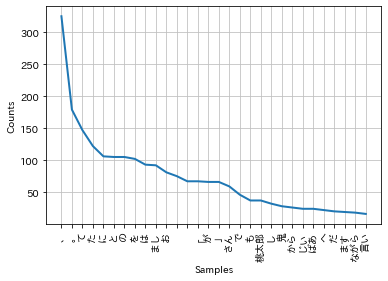

In [7]:
# 単語の出現頻度順

print("\n# FreqDist")
fdist = nltk.FreqDist(tokens)
check_num = 30
print(fdist.most_common(check_num))

%matplotlib inline
import japanize_matplotlib
fdist.plot(check_num)


## bi-gram


# FreqDist with bigram (2-gram)
[(('まし', 'た'), 92), (('た', '。'), 91), (('。', '」'), 66), (('て', '、'), 64), (('\n ', '「'), 57), (('」', '\n \u3000'), 39), (('。', '\n \u3000'), 36), (('。', '\n '), 32), (('、', 'お'), 28), (('は', '、'), 27), (('と', '、'), 26), (('お', 'じい'), 24), (('じい', 'さん'), 24), (('お', 'ばあ'), 24), (('ばあ', 'さん'), 24), (('に', '、'), 23), (('\n \u3000', 'と'), 22), (('し', 'て'), 21), (('さん', 'は'), 19), (('ながら', '、'), 18), (('、', '\n '), 17), (('で', '、'), 16), (('」', '\n '), 16), (('を', 'し'), 14), (('て', 'い'), 13), (('桃太郎', 'は'), 13), (('と', 'お'), 12), (('て', '来'), 12), (('から', '、'), 11), (('言い', 'まし'), 11)]


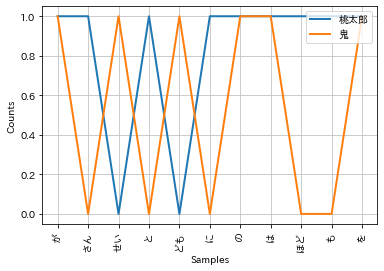

In [8]:
# bigram
print("\n# FreqDist with bigram (2-gram)")
bigrams = nltk.bigrams(tokens)
bigrams_fdist = nltk.FreqDist(bigrams)
print(bigrams_fdist.most_common(check_num))

# conditional FreqDist
cfd = nltk.ConditionalFreqDist(bigrams_fdist)
cfd.plot(conditions=["桃太郎", "鬼"])


## 係り受け解析＋格解析

In [9]:
print("----係り受け木----")
from pathlib import Path
from spacy import displacy

#sentence = "お爺さんは山へ芝刈りに、お婆さんは川へ洗濯に行きました。"
sentence = "お爺さんは山へ芝刈りに行きました。"
doc = nlp(sentence)

for sent in doc.sents:
    svg = displacy.render(sent, style="dep", jupyter=True)


----係り受け木----


In [10]:
options = {"compact": True, "bg": "#090305",
           "color": "white", "font": "Source Sans Pro"}
for sent in doc.sents:
    svg = displacy.render(sent, style="dep", jupyter=True, options=options)


In [11]:
print("----Docオブジェクトから名詞句だけを抽出----")
for chunk in doc.noun_chunks:
    print(chunk)


----Docオブジェクトから名詞句だけを抽出----
お爺さん
山
芝刈り


In [12]:
# 名詞句を中心に係り受け
print("chunk\troot\tdep_\troot.head")
labels = set()
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)
    labels.add(chunk.root.dep_)

print("----------")
for label in labels:
    print('{} = {}'.format(label, spacy.explain(label)))


chunk	root	dep_	root.head
お爺さん さん nsubj 行き
山 山 obl 行き
芝刈り 芝刈り obl 行き
----------
nsubj = nominal subject
obl = oblique nominal


## 係り受け解析を利用したクエリ検索の例

In [13]:
# 係り受けを利用したクエリ検索例
# 補足：
#   係り受け関係が想定と異なっているため、中継単語からの検索まで実装。

def search(sentence, user_query):
    nlp = spacy.load("ja_ginza")
    doc = nlp(sentence)

    relay_words = []
    candidate_words = []
    # 係り受け先（子ノード）検索
    print("# 係り受け先(子ノード)")
    for chunk in doc.noun_chunks:
        if chunk.text == user_query:
            if chunk.root.dep_ == 'obl':
                relay_words.append(chunk.root.head.text)
            if chunk.root.dep_ == 'nsubj':
                candidate_words.append(chunk.root.head.text)
    
    # 中継単語からの検索
    if len(relay_words) >= 1:
        for word in relay_words:
            for chunk in doc.noun_chunks:
                if chunk.root.head.text == word:
                    if chunk.root.dep_ == 'obl':
                        relay_words.append(chunk.text)
                    if chunk.root.dep_ == 'nsubj':
                        candidate_words.append(chunk.text)
    
    return relay_words, candidate_words


sentence = "お爺さんは山へ芝刈りに、お婆さんは川へ洗濯に行きました。"
user_query = "芝刈り"
print('\n# user_query = {}'.format(user_query))

relay_words, candidate_words = search(sentence, user_query)
print("relay_words: ", relay_words)
print("candidate_words: ", candidate_words)



# user_query = 芝刈り
# 係り受け先(子ノード)
relay_words:  ['行き', '芝刈り', '川', '洗濯', '山']
candidate_words:  ['お爺さん', 'お婆さん']


## 固有表現

In [14]:
print("----固有表現----")
doc = nlp(sentence)
print("固有表現,開始index,終了index,ラベル")
for entity in doc.ents:
    print(entity.text, entity.start_char, entity.end_char, entity.label_)


----固有表現----
固有表現,開始index,終了index,ラベル
芝刈り 7 10 GOE_Other


In [15]:
!date

Wed Apr 14 06:21:12 UTC 2021
